<a href="https://colab.research.google.com/github/Y-Tee23/PRODIGY_ML_01/blob/main/SalePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Libraries**

In [99]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

import missingno

# **2. Import and Read Data**

In [100]:
data = pd.read_csv("train.csv")

In [101]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [102]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# **3. Data Description**

---



* SalePrice - the property's sale price in dollars.
    This is the target variable that we're trying to predict.
*MSSubClass: The building class
*MSZoning: The general zoning classification
*LotFrontage: Linear feet of street connected to property
*LotArea: Lot size in square feet
*Street: Type of road access
*Alley: Type of alley access
*LotShape: General shape of property
*LandContour: Flatness of the property
*Utilities: Type of utilities available
*LotConfig: Lot configuration
*LandSlope: Slope of property
8Neighborhood: Physical locations within Ames city limits
*Condition1: Proximity to main road or railroad
*Condition2: Proximity to main road or railroad (if a second is present)
*BldgType: Type of dwelling
*HouseStyle: Style of dwelling
*OverallQual: Overall material and finish quality
*OverallCond: Overall condition rating
*YearBuilt: Original construction date
*YearRemodAdd: Remodel date
*RoofStyle: Type of roof
*RoofMatl: Roof material
*Exterior1st: Exterior covering on house
*Exterior2nd: Exterior covering on house (if more than one material)
*MasVnrType: Masonry veneer type
*MasVnrArea: Masonry veneer area in square feet
*ExterQual: Exterior material quality
*ExterCond: Present condition of the material on the exterior
*Foundation: Type of foundation
*BsmtQual: Height of the basement
*BsmtCond: General condition of the basement
*BsmtExposure: Walkout or garden level basement walls
*BsmtFinType1: Quality of basement finished area
*BsmtFinSF1: Type 1 finished square feet
*BsmtFinType2: Quality of second finished area (if present)
*BsmtFinSF2: Type 2 finished square feet
*BsmtUnfSF: Unfinished square feet of basement area
*TotalBsmtSF: Total square feet of basement area
*Heating: Type of heating
*HeatingQC: Heating quality and condition
*CentralAir: Central air conditioning
*Electrical: Electrical system
*1stFlrSF: First Floor square feet
*2ndFlrSF: Second floor square feet
*LowQualFinSF: Low quality finished square feet (all floors)
*GrLivArea: Above grade (ground) living area square feet
*BsmtFullBath: Basement full bathrooms
*BsmtHalfBath: Basement half bathrooms
*FullBath: Full bathrooms above grade
*HalfBath: Half baths above grade
*Bedroom: Number of bedrooms above basement level
*Kitchen: Number of kitchens
*KitchenQual: Kitchen quality
*TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
*Functional: Home functionality rating
*Fireplaces: Number of fireplaces
*FireplaceQu: Fireplace quality
*GarageType: Garage location
*GarageYrBlt: Year garage was built
*GarageFinish: Interior finish of the garage
*GarageCars: Size of garage in car capacity
*GarageArea: Size of garage in square feet
*GarageQual: Garage quality
*GarageCond: Garage condition
*PavedDrive: Paved driveway
*WoodDeckSF: Wood deck area in square feet
*OpenPorchSF: Open porch area in square feet
*EnclosedPorch: Enclosed porch area in square feet
*3SsnPorch: Three season porch area in square feet
*ScreenPorch: Screen porch area in square feet
*PoolArea: Pool area in square feet
*PoolQC: Pool quality
*Fence: Fence quality
*MiscFeature: Miscellaneous feature not covered in other categories
*MiscVal: $Value of miscellaneous feature
*MoSold: Month Sold
*YrSold: Year Sold
*SaleType: Type of sale
*SaleCondition: Condition of sale

# **4. Exploratory Data Analysis**

---


**4.1 Summary Statistics, Missing values and data types.**

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

This dataset has 80 features. This is obviously a lot so to avoid potential overfitting,  we need to extract features we're interested in and focus on those.

We have found the following features to be enough for our model. SalePrice, MSSubclass, LoftArea,OverallQual,Overallcond,ExterQual, ExterCond, TotalBsmtSF, GarageArea, RoofStyle, Bedroom, Kitchen, Functional, Fireplaces, HouseStyle, LandSlope, Utilities, CentralAir, HeatingQC, 2ndFlrSF, 1stFlrSF

In [105]:
chosenFeatures = ["SalePrice", "MSSubClass", "LotArea","OverallQual","OverallCond","ExterQual", "ExterCond","TotalBsmtSF","GarageArea","RoofStyle",'BedroomAbvGr', "KitchenAbvGr","Functional","Fireplaces",'HouseStyle',"LandSlope", "Utilities","CentralAir", 'HeatingQC', "2ndFlrSF", "1stFlrSF", "TotRmsAbvGrd", "KitchenQual", "FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath"]

In [106]:
new_df = data[chosenFeatures]

In [107]:
new_df.head()

,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,TotalBsmtSF,GarageArea,RoofStyle,...,CentralAir,HeatingQC,2ndFlrSF,1stFlrSF,TotRmsAbvGrd,KitchenQual,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath
0,208500,60,8450,7,5,Gd,TA,856,548,Gable,...,Y,Ex,854,856,8,Gd,2,1,1,0
1,181500,20,9600,6,8,TA,TA,1262,460,Gable,...,Y,Ex,0,1262,6,TA,2,0,0,1
2,223500,60,11250,7,5,Gd,TA,920,608,Gable,...,Y,Ex,866,920,6,Gd,2,1,1,0
3,140000,70,9550,7,5,TA,TA,756,642,Gable,...,Y,Gd,756,961,7,Gd,1,0,1,0
4,250000,60,14260,8,5,Gd,TA,1145,836,Gable,...,Y,Ex,1053,1145,9,Gd,2,1,1,0


<Axes: >

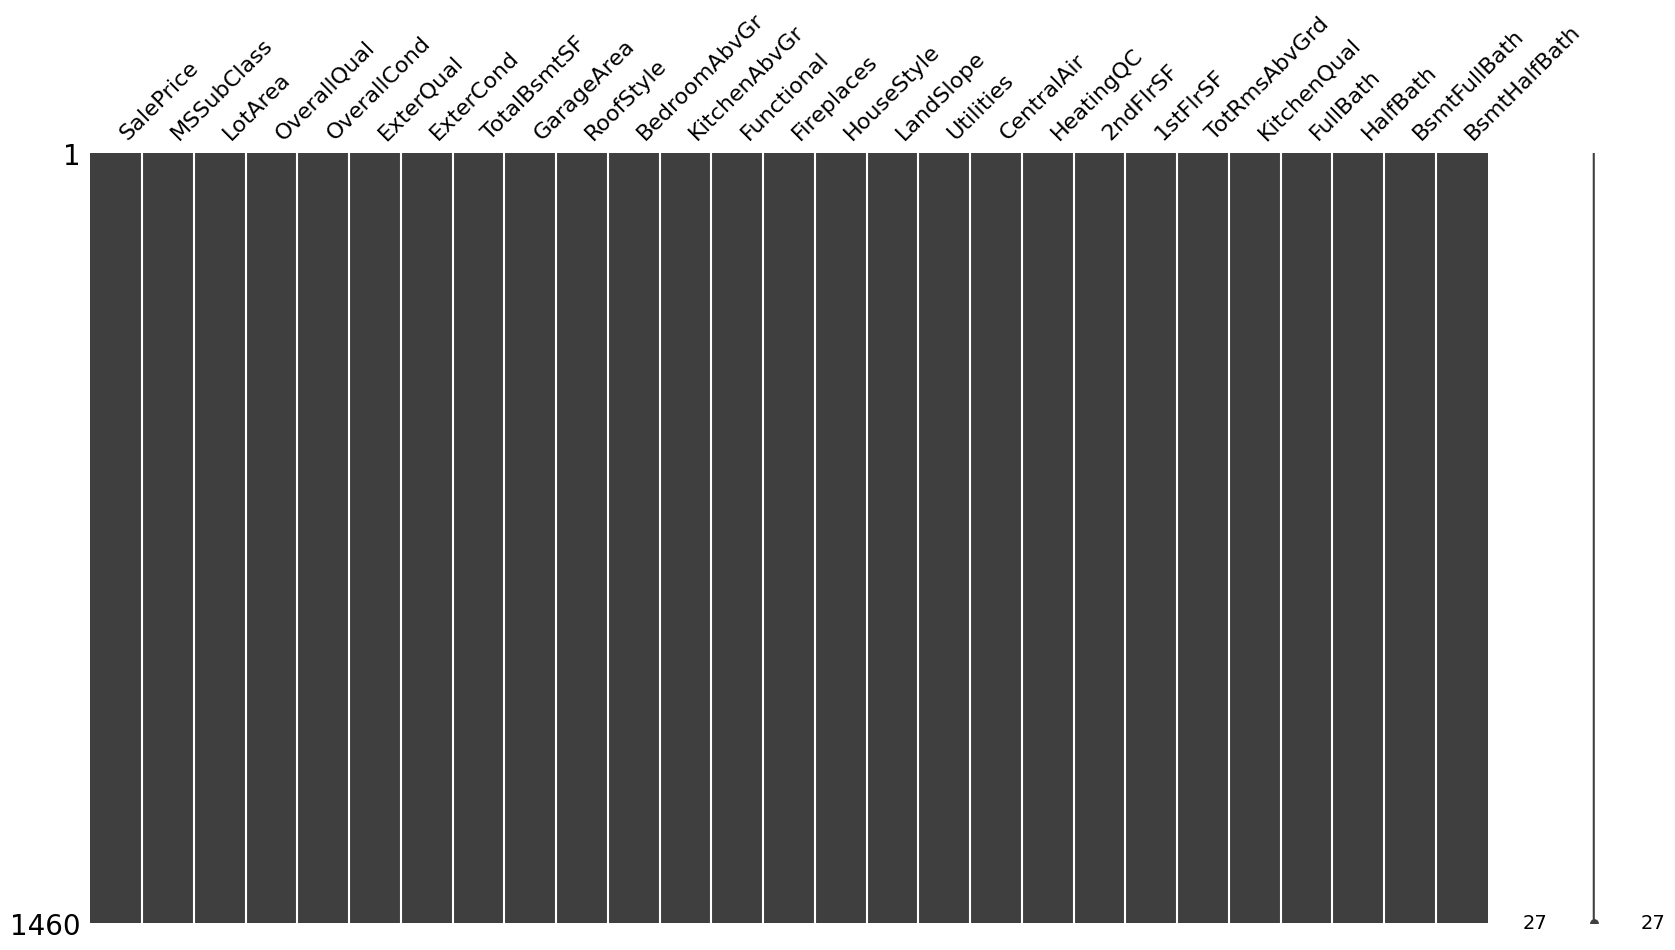

In [108]:
missingno.matrix(new_df, figsize=(20,10))

In [109]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     1460 non-null   int64 
 1   MSSubClass    1460 non-null   int64 
 2   LotArea       1460 non-null   int64 
 3   OverallQual   1460 non-null   int64 
 4   OverallCond   1460 non-null   int64 
 5   ExterQual     1460 non-null   object
 6   ExterCond     1460 non-null   object
 7   TotalBsmtSF   1460 non-null   int64 
 8   GarageArea    1460 non-null   int64 
 9   RoofStyle     1460 non-null   object
 10  BedroomAbvGr  1460 non-null   int64 
 11  KitchenAbvGr  1460 non-null   int64 
 12  Functional    1460 non-null   object
 13  Fireplaces    1460 non-null   int64 
 14  HouseStyle    1460 non-null   object
 15  LandSlope     1460 non-null   object
 16  Utilities     1460 non-null   object
 17  CentralAir    1460 non-null   object
 18  HeatingQC     1460 non-null   object
 19  2ndFlr

We can see that in our new dataframe, we have 0 missing/null values in all our features.


# **4.3 Feature Engineering**

---

We've identified 1 new features we can derive from our data.




1.   HasBsmnt - a feature indicating whether the property has a basement or not(1 = yes, 0 =no)







In [110]:
#HasBsmt
new_df["HasBsmt"] = new_df['TotalBsmtSF'].apply(lambda x: 1 if x != 0 else 0)
# new_df["Has2ndFlr"] = new_df['2ndFlrSF'].apply(lambda x: 1 if x != 0 else 0)
# new_df["HasACorHeat"] = new_df[]

<ipython-input-110-7480c43cd319>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["HasBsmt"] = new_df['TotalBsmtSF'].apply(lambda x: 1 if x != 0 else 0)


In [111]:
new_df.head()

,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,TotalBsmtSF,GarageArea,RoofStyle,...,HeatingQC,2ndFlrSF,1stFlrSF,TotRmsAbvGrd,KitchenQual,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,HasBsmt
0,208500,60,8450,7,5,Gd,TA,856,548,Gable,...,Ex,854,856,8,Gd,2,1,1,0,1
1,181500,20,9600,6,8,TA,TA,1262,460,Gable,...,Ex,0,1262,6,TA,2,0,0,1,1
2,223500,60,11250,7,5,Gd,TA,920,608,Gable,...,Ex,866,920,6,Gd,2,1,1,0,1
3,140000,70,9550,7,5,TA,TA,756,642,Gable,...,Gd,756,961,7,Gd,1,0,1,0,1
4,250000,60,14260,8,5,Gd,TA,1145,836,Gable,...,Ex,1053,1145,9,Gd,2,1,1,0,1


In [112]:
scaler = StandardScaler()
new_df[['SalePrice', 'MSSubClass', 'LotArea', 'OverallQual', "OverallCond", "TotalBsmtSF", "GarageArea", "2ndFlrSF", "1stFlrSF", "TotRmsAbvGrd", "FullBath","HalfBath", "BsmtHalfBath","HasBsmt"]] = scaler.fit_transform(new_df[['SalePrice', 'MSSubClass', 'LotArea', 'OverallQual', "OverallCond", "TotalBsmtSF", "GarageArea", "2ndFlrSF", "1stFlrSF", "TotRmsAbvGrd", "FullBath","HalfBath", "BsmtHalfBath","HasBsmt"]])

<ipython-input-112-470e653aac25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['SalePrice', 'MSSubClass', 'LotArea', 'OverallQual', "OverallCond", "TotalBsmtSF", "GarageArea", "2ndFlrSF", "1stFlrSF", "TotRmsAbvGrd", "FullBath","HalfBath", "BsmtHalfBath","HasBsmt"]] = scaler.fit_transform(new_df[['SalePrice', 'MSSubClass', 'LotArea', 'OverallQual', "OverallCond", "TotalBsmtSF", "GarageArea", "2ndFlrSF", "1stFlrSF", "TotRmsAbvGrd", "FullBath","HalfBath", "BsmtHalfBath","HasBsmt"]])


In [113]:
#ACorHeating
# new_df["ACorHeating"]
# new_df["HeatingQC"].value_counts()

In [114]:
# X = new_df.drop(columns=['SalePrice'])
# X_values = new_df.drop(columns=['SalePrice']).values
# Y = new_df['SalePrice']
# Y_values = new_df['SalePrice'].values

We need to use both One hot encoding and Label encoding for our categorical features.

In [115]:
ordinal_mapping = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5}
new_df['ExterQualEnc'] = new_df['ExterQual'].map(ordinal_mapping)
new_df['ExterCondEnc'] = new_df["ExterCond"].map(ordinal_mapping)
new_df['HeatingQCEnc'] = new_df["HeatingQC"].map(ordinal_mapping)
new_df['KitchenQualEnc'] = new_df["KitchenQual"].map(ordinal_mapping)
new_df.drop(columns=['ExterQual', 'ExterCond', "HeatingQC", "KitchenQual"],axis=1, inplace=True)


<ipython-input-115-631e271a246e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ExterQualEnc'] = new_df['ExterQual'].map(ordinal_mapping)
<ipython-input-115-631e271a246e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ExterCondEnc'] = new_df["ExterCond"].map(ordinal_mapping)
<ipython-input-115-631e271a246e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [116]:
colToEnc = ['RoofStyle', 'HouseStyle','LandSlope', 'CentralAir', 'Functional', 'HouseStyle', "Utilities"]

one_hot_encoded_df = pd.get_dummies(new_df[colToEnc])

final_df = pd.concat([new_df, one_hot_encoded_df], axis=1)

In [117]:
final_df.drop(columns = ['RoofStyle', 'HouseStyle','LandSlope', 'CentralAir', 'Functional', 'HouseStyle', 'Utilities'], axis=1,inplace=True)

In [118]:

X = final_df.drop(['SalePrice'], axis=1)  # Drop the categorical columns that were one-hot encoded
y = final_df['SalePrice']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [121]:
y_pred_test = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Mean Squared Error (Test):", mse_test)
print("R-squared Score (Test):", r2_test)

Mean Squared Error (Test): 0.2078661526465041
R-squared Score (Test): 0.8290857724456275
